# An inquiry into Power Laws with Baseball Stats

## Introduction

Analyzing Pareto's Law and Price's Law using two different types of productivity data which will be defined as 'intellectual' and 'physical' :

Defining Pareto's Law:

Pareto's Law is the famous '80/20' rule. Which is to say that about 20% of producers in a given domain will produce 80% of the overall results. The economist Vilfredo Pareto formulated it by checking tax records and finding that 20% of the people produced (or accumulated) 80% of the income in a town. So for example, if a town hjas 100 residents and produced 1,000 dollars of income then 20 of those residents will have 800 dollars of the towns income. 

Defining Price's Law:

Price's law is similar to Parreto's law in that it is an attempt to describe how certain productive qualities can scale. It was formulated by Derek J. de Solla Price who analyzed academic publications and found that the square root of producers of published scholarly papers produced half of all publications. So for example, if 100 professors published 1000 papers then 10 of those professors will have published 500 of the total papers. 

Do these power laws of highly productive people work across different types of production? 

The different types of production:

Physical: meaning something that has to be done physically by a persInteeon everytime the production happens. So for example, if i gave 100 people shovels and asked them to dig up 1000 acres of land would 20 of those people dig up 800 acres or would 10 of those people dig up 500 acres? Since the process of digging with shovels requires that every acre be dug individual again and again would one of the power laws apply to pysical porduction like that?

Intellectual: meaning an intangible product that does not require physically producing the work over an over again. So for example, a piece of software like an app in an app store, once completed, it can be purchased over and over again without any extra physical production to produce it. Books, recorded music, movies and other forms of enterainment are examples of an intellectual product that can be sold endlessly despite only needing to be produced once. 

How do MLB baseball stats fit into power laws?

I'm using babseball stats because of the availablity of the statistics and I think professional sports leagues may prove to be a good combination of physical and intellectual production. 

There is pysical production in sports because actually playing the games requires the player to show up and put in physical work. Also, because the rules are clearly defined and every team, in theory, has the same end goal of winning the league championship this hopefully removes the subjective element of analyzing productivity data as the quality of a product (as opposed to the quantity) is a difficult, inherently subjective measure to come up with.

There is intellectual production in sports because payment for individual players can be based on things other than just physical production. Teams need to draw in fans with big name players whose fame can be based on intangible personal charcteristics or even advertising endorsements outside of the sport itself.



I will be using data from 2004 which is the year Ichiro Suzuki broke the single season hits record so I figure that year will be as good as anyother arbitrary year with salary information still available. 

My Hypothesis is that the physical work will not scale the same as the intellectual work which will be measured in salaries. 

In [114]:
#importing libraries and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Batting = pd.read_csv('Batting.csv')
appearances = pd.read_csv('Appearances.csv')
salaries = pd.read_csv('Salaries.csv')
other_salaries = pd.read_csv('1985-2004sals.csv')

len(Batting), len(appearances), len(salaries), len(other_salaries)

(104324, 104256, 26428, 16986)

In [4]:
Batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [5]:
appearances.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,1.0,1,1.0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
1,1871,RC1,NaN,addybo01,25,25.0,25,25.0,0,0,...,22,0,3,0,0,0,0,0.0,0.0,0.0
2,1871,CL1,NaN,allisar01,29,29.0,29,29.0,0,0,...,2,0,0,0,29,0,29,0.0,0.0,0.0
3,1871,WS3,NaN,allisdo01,27,27.0,27,27.0,0,27,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1871,RC1,NaN,ansonca01,25,25.0,25,25.0,0,5,...,2,20,0,1,0,0,1,0.0,0.0,0.0


Salary data had to be collected from a different source than the data for on-field player stats. The first file only had data for the needed for about 40-50 players

In [115]:
other_salaries.head() 




,"Aase, Don",525000,1985,Bal,AL
0,"Aase, Don",600000,1986,Bal,AL
1,"Aase, Don",625000,1987,Bal,AL
2,"Aase, Don",675000,1988,Bal,AL
3,"Aase, Don",400000,1989,NYM,NL
4,"Abbott, Jeff",175000,1998,CWS,AL


In [116]:
#the csv imported without column headers. Adding them in this cell.

col_names = ["playerID", "salary", "yearID", "team", "league"]

other_salaries = pd.read_csv('1985-2004sals.csv', names=col_names)


other_salaries.head()

,playerID,salary,yearID,team,league
0,"Aase, Don",525000,1985,Bal,AL
1,"Aase, Don",600000,1986,Bal,AL
2,"Aase, Don",625000,1987,Bal,AL
3,"Aase, Don",675000,1988,Bal,AL
4,"Aase, Don",400000,1989,NYM,NL


In [118]:
#adjusted inflation data does not seem to be immediately available
#so will be using data for one year at a time

salaries_oh_four = other_salaries.query("yearID == 2004")

salaries_oh_four.head()

,playerID,salary,yearID,team,league
16161,"Colon, Bartolo",11000000,2004,Ana,AL
16162,"Guerrero, Vladimir",11000000,2004,Ana,AL
16163,"Glaus, Troy",10450000,2004,Ana,AL
16164,"Salmon, Tim",9900000,2004,Ana,AL
16165,"Sele, Aaron",8666667,2004,Ana,AL


In [137]:
salaries_oh_four.query('playerID == "Suzuki, Ichiro"')

,playerID,salary,yearID,team,league
16446,"Suzuki, Ichiro",6528000,2004,Sea,AL


In [119]:
#all of this data came from the same source and it is organized in the same way
#merging them all

df = Batting.query("yearID == 2004")

df2 = appearances.query("yearID == 2004")

df3 = salaries.query("yearID == 2004")

len(df), len(df2), len(df4)

(1346, 1345, 1553)

In [54]:
salaries.head(), Batting.head(), appearances.head()

(   yearID teamID lgID   playerID  salary
 0    1985    ATL   NL  barkele01  870000
 1    1985    ATL   NL  bedrost01  550000
 2    1985    ATL   NL  benedbr01  545000
 3    1985    ATL   NL   campri01  633333
 4    1985    ATL   NL  ceronri01  625000,
     playerID  yearID  stint teamID lgID   G   AB   R   H  2B  ...    RBI   SB  \
 0  abercda01    1871      1    TRO  NaN   1    4   0   0   0  ...    0.0  0.0   
 1   addybo01    1871      1    RC1  NaN  25  118  30  32   6  ...   13.0  8.0   
 2  allisar01    1871      1    CL1  NaN  29  137  28  40   4  ...   19.0  3.0   
 3  allisdo01    1871      1    WS3  NaN  27  133  28  44  10  ...   27.0  1.0   
 4  ansonca01    1871      1    RC1  NaN  25  120  29  39  11  ...   16.0  6.0   
 
     CS  BB   SO  IBB  HBP  SH  SF  GIDP  
 0  0.0   0  0.0  NaN  NaN NaN NaN   0.0  
 1  1.0   4  0.0  NaN  NaN NaN NaN   0.0  
 2  1.0   2  5.0  NaN  NaN NaN NaN   1.0  
 3  1.0   0  2.0  NaN  NaN NaN NaN   0.0  
 4  2.0   2  1.0  NaN  NaN NaN NaN   0

In [122]:
df4 = pd.merge(df, df2, on='playerID', how='outer')

df5 = pd.merge(df3,df4, on='playerID', how='outer' )

df6 = df5.drop_duplicates("playerID")



In [145]:
#Checking Ichiro's career stats to make sure the year is correct for his record breaking hits year.
Batting.query("playerID == 'suzukic01'")

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
81815,suzukic01,2001,1,SEA,AL,157,692,127,242,34,...,69.0,56.0,14.0,30,53.0,10.0,8.0,4.0,4.0,3.0
83143,suzukic01,2002,1,SEA,AL,157,647,111,208,27,...,51.0,31.0,15.0,68,62.0,27.0,5.0,3.0,5.0,8.0
84473,suzukic01,2003,1,SEA,AL,159,679,111,212,29,...,62.0,34.0,8.0,36,69.0,7.0,6.0,3.0,1.0,3.0
85828,suzukic01,2004,1,SEA,AL,161,704,101,262,24,...,60.0,36.0,11.0,49,63.0,19.0,4.0,2.0,3.0,6.0
87151,suzukic01,2005,1,SEA,AL,162,679,111,206,21,...,68.0,33.0,8.0,48,66.0,23.0,4.0,2.0,6.0,5.0
88528,suzukic01,2006,1,SEA,AL,161,695,110,224,20,...,49.0,45.0,2.0,49,71.0,16.0,5.0,1.0,2.0,2.0
89914,suzukic01,2007,1,SEA,AL,161,678,111,238,22,...,68.0,37.0,8.0,49,77.0,13.0,3.0,4.0,2.0,7.0
91307,suzukic01,2008,1,SEA,AL,162,686,103,213,20,...,42.0,43.0,4.0,51,65.0,12.0,5.0,3.0,4.0,8.0
92691,suzukic01,2009,1,SEA,AL,146,639,88,225,31,...,46.0,26.0,9.0,32,71.0,15.0,4.0,2.0,1.0,1.0
94053,suzukic01,2010,1,SEA,AL,162,680,74,214,30,...,43.0,42.0,9.0,45,86.0,13.0,3.0,3.0,1.0,3.0


In [120]:
df7 = pd.merge(Batting, appearances, on='playerID', how='inner')



In [10]:
ABs = df6.query("yearID_x == 2004 and AB > 0")

All_at_Bats = df4.query("yearID_x == '2004' and AB >= 0")

len(ABs), len(All_at_Bats)

(953, 1247)

In [11]:
ABs.head()

,playerID,yearID_x,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
5,abreubo01,2004,1,PHI,NL,159,574,118,173,47,...,0,0,0,0,0,158,158,0.0,2.0,0.0
6,acevejo01,2004,1,CIN,NL,39,43,0,2,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
8,adamsru01,2004,1,TOR,AL,22,72,10,22,2,...,0,0,21,0,0,0,0,0.0,4.0,0.0
15,aguilch01,2004,1,FLO,NL,29,45,10,10,2,...,0,0,0,6,0,14,20,0.0,8.0,4.0
17,alexama02,2004,1,TEX,AL,21,21,3,5,2,...,11,3,7,0,0,0,0,0.0,0.0,4.0


In [12]:
ABs.to_csv('ABs.csv', sep='\t')

In [13]:
 ABs = ABs.drop_duplicates("playerID")

In [14]:
ABs.query("playerID == 'suzukic01'")

,playerID,yearID_x,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
1360,suzukic01,2004,1,SEA,AL,161,704,101,262,24,...,0,0,0,0,0,158,158,3.0,0.0,1.0


In [15]:
#hits for the entire league

batting_sum = ABs['H'].sum()

batting_sum

43345

In [16]:
sorted_hits = ABs.sort_values('H', ascending=False)

In [17]:
#the group that Price's Law will be checked with

Price_check = int(math.sqrt(len(sorted_hits)))

top_hitters = sorted_hits.iloc[:Price_check]

Price_check

30

In [18]:
top_hitters['H'].sum() / batting_sum

0.13254123889721997

In [19]:
32 / 1022

0.03131115459882583

In [20]:
top_hitters['AB'].sum()

18415

In [21]:
ABs['AB'].sum()

162452

In [22]:
#the group that Pareto's Law will be checked against
pareto_hitters = sorted_hits.iloc[:int(len(ABs)/5)]

In [74]:
pareto_hitters.head()

,playerID,yearID_x,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
1360,suzukic01,2004,1,SEA,AL,161,704,101,262,24,...,0,0,0,0,0,158,158,3.0,0.0,1.0
1153,pierrju01,2004,1,FLO,NL,162,678,100,221,22,...,0,0,0,0,162,0,162,0.0,0.0,0.0
1543,youngmi02,2004,1,TEX,AL,160,690,114,216,33,...,0,0,158,0,0,0,0,2.0,0.0,0.0
886,loretma01,2004,1,SDN,NL,154,620,108,208,47,...,154,0,0,0,0,0,0,0.0,0.0,0.0
610,guerrvl01,2004,1,ANA,AL,156,612,124,206,39,...,0,0,0,0,0,143,143,13.0,0.0,0.0


In [24]:
pareto_hitters['H'].sum() / batting_sum

0.64766409043719

In [25]:
pareto_hitters['AB'].sum() / ABs['AB'].sum()

0.606763844089331

In [146]:
#the two leagues have different rules about who can be a hitter in a given game
#distinguioshing between the two may prove useful

AL_hitters = ABs.query("lgID_x == 'AL'")

NL_hitters = ABs.query("lgID_x == 'NL'")

len(AL_hitters), len(NL_hitters)

(397, 556)

In [27]:
AL_batting_sum = AL_hitters["H"].sum()

NL_batting_sum = NL_hitters["H"].sum()


AL_batting_sum , NL_batting_sum

(20750, 22595)

In [28]:
AL_hitters_sorted = AL_hitters.sort_values("H", ascending=False)

NL_hitters_sorted = NL_hitters.sort_values("H", ascending=False)

In [29]:
Price_AL = AL_hitters_sorted.iloc[:int(math.sqrt(len(AL_hitters)))]

Price_NL = NL_hitters_sorted.iloc[:int(math.sqrt(len(NL_hitters)))]

Pareto_AL = AL_hitters_sorted.iloc[:int(len(AL_hitters)/5)]

Pareto_NL = NL_hitters_sorted.iloc[:int(len(NL_hitters)/5)]

In [30]:
Price_AL_sum = Price_AL["H"].sum()

Price_AL_sum,  Price_AL_sum/AL_batting_sum

(3593, 0.1731566265060241)

In [31]:
len(Price_AL), len(Price_NL)

(19, 23)

In [32]:
len(Pareto_AL), len(Pareto_NL)

(79, 111)

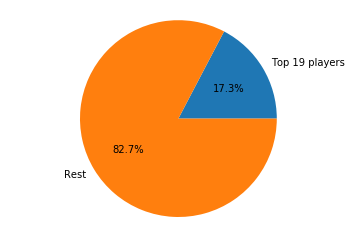

In [133]:
Labels = ['Top 19 hitters', 'Rest']
sections = [Price_AL_sum, (AL_batting_sum - Price_AL_sum)]


fig1, ax1 = plt.subplots()
ax1.pie(sections, labels= Labels, autopct='%1.1f%%')
ax1.axis('equal')
        
plt.show()


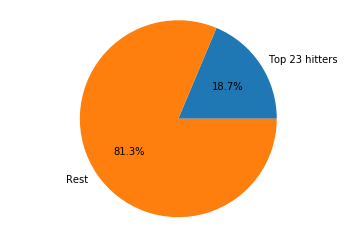

In [132]:
Labels = ['Top 23 hitters', 'Rest']
sections = [Price_NL_sum, (NL_batting_sum - Price_NL_sum)]


fig1, ax1 = plt.subplots()
ax1.pie(sections, labels= Labels, autopct='%1.1f%%')
ax1.axis('equal')
        
plt.show()


In [33]:
Price_NL_sum = Price_NL["H"].sum()

Price_NL_sum, Price_NL_sum/NL_batting_sum

(4219, 0.1867227262668732)

In [34]:
Pareto_AL_sum = Pareto_AL["H"].sum()

Pareto_AL_sum, Pareto_AL_sum/AL_batting_sum

(12279, 0.5917590361445784)

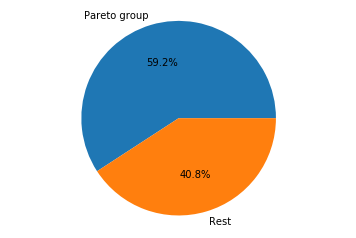

In [134]:
Labels = ['Pareto group', 'Rest']
sections = [Pareto_AL_sum, (AL_batting_sum - Pareto_AL_sum)]


fig1, ax1 = plt.subplots()
ax1.pie(sections, labels= Labels, autopct='%1.1f%%')
ax1.axis('equal')
        
plt.show()


In [35]:
Pareto_NL_sum = Pareto_NL["H"].sum()

Pareto_NL_sum, Pareto_NL_sum/NL_batting_sum

(15564, 0.6888249612746182)

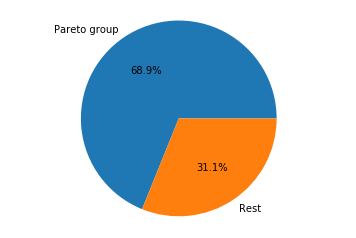

In [135]:
Labels = ['Pareto group', 'Rest']
sections = [Pareto_NL_sum, (NL_batting_sum - Pareto_NL_sum)]


fig1, ax1 = plt.subplots()
ax1.pie(sections, labels= Labels, autopct='%1.1f%%')
ax1.axis('equal')
        
plt.show()

In [72]:
Pareto_AL.head()

,playerID,yearID_x,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
1360,suzukic01,2004,1,SEA,AL,161,704,101,262,24,...,0,0,0,0,0,158,158,3.0,0.0,1.0
1543,youngmi02,2004,1,TEX,AL,160,690,114,216,33,...,0,0,158,0,0,0,0,2.0,0.0,0.0
610,guerrvl01,2004,1,ANA,AL,156,612,124,206,39,...,0,0,0,0,0,143,143,13.0,0.0,0.0
1374,tejadmi01,2004,1,BAL,AL,162,653,107,203,40,...,0,0,162,0,0,0,0,0.0,0.0,0.0
805,kotsama01,2004,1,OAK,AL,148,606,78,190,37,...,0,0,0,0,145,0,145,1.0,6.0,1.0


In [37]:
Batting_copy = Batting.copy()

Batting_copy["H"].mean()

37.01114796211802

In [38]:
name_list = Batting_copy.query("AB > 0")

name_list = name_list["playerID"]

len(name_list), len(set(name_list)), math.sqrt(len(set(name_list)))

(88461, 17109, 130.80137613954986)

In [39]:
Batting_copy['H'].sum()

3861151

In [40]:
Batting_copy_sorted = Batting_copy.sort_values("H", ascending=False)

Price_check_all = Batting_copy_sorted.iloc[:int(math.sqrt(len(name_list)))]

In [41]:
Price_check_all["H"].sum() / Batting_copy['H'].sum()

0.01676572607494501

In [73]:
salaries_oh_four_sorted = salaries_oh_four.sort_values("salary", ascending=False)

salaries_oh_four_sorted.head()

,playerID,salary,yearID,team,league
16386,"Rodriguez, Alex",21726881,2004,NYY,AL:
16216,"Ramirez, Manny",20409542,2004,Bos,AL
16526,"Delgado, Carlos",19700000,2004,Tor,AL
16387,"Jeter, Derek",18600000,2004,NYY,AL
16956,"Bonds, Barry",18000000,2004,SF,NL


In [144]:
salaries_oh_four_sorted.head()

,playerID,salary,yearID,team,league
16386,"Rodriguez, Alex",21726881,2004,NYY,AL:
16216,"Ramirez, Manny",20409542,2004,Bos,AL
16526,"Delgado, Carlos",19700000,2004,Tor,AL
16387,"Jeter, Derek",18600000,2004,NYY,AL
16956,"Bonds, Barry",18000000,2004,SF,NL


In [106]:
salary_pareto = salaries_oh_four_sorted.iloc[:int(len(salaries_oh_four)/5)]

salary_price = salaries_oh_four_sorted.iloc[: int(math.sqrt(len(salaries_oh_four)))]


len(salary_pareto), len(salary_price)

(165, 28)

In [108]:
salaries_oh_four["salary"].sum(), salaries_oh_four["salary"].mean()

(2050573344, 2482534.314769976)

In [109]:
pareto_sal_sum = salary_pareto["salary"].sum()


price_sal_sum = salary_price["salary"].sum()

In [110]:
pareto_sal_sum / salaries_oh_four["salary"].sum()

0.6763995465260471

In [111]:
price_sal_sum / salaries_oh_four["salary"].sum()

0.20771415187185813

In [112]:
len(salary_price)/ len(salaries_oh_four)

0.03389830508474576

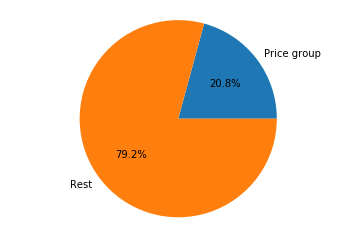

In [143]:
Labels = ['Price group', 'Rest']
sections = [price_sal_sum, (salaries_oh_four["salary"].sum() - price_sal_sum)]


fig1, ax1 = plt.subplots()
ax1.pie(sections, labels= Labels, autopct='%1.1f%%')
ax1.axis('equal')
        
plt.show()

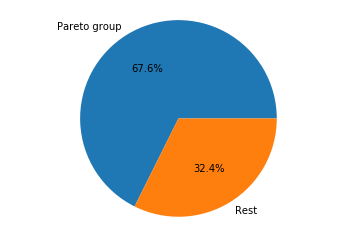

In [142]:
Labels = ['Pareto group', 'Rest']
sections = [pareto_sal_sum, (salaries_oh_four["salary"].sum() - pareto_sal_sum)]


fig1, ax1 = plt.subplots()
ax1.pie(sections, labels= Labels, autopct='%1.1f%%')
ax1.axis('equal')
        
plt.show()

# Conclusion



It appears that power laws may apply as good rules of thumb but would need to to altered in their original form. 

It does appear that the group of players that would fall into the Pareto distribution group (top 20%) are much more productive than the average player. The same goes for the even smaller group that would fall into the Price's law group but not nearly to the extent that might be predicted by the original formulation of Price's law. 

The hypothesis that the "intellectual" aspect of the game would be more subject to a power law seems to only have some validity. It might be true that the very top players get paid something like 10% more than their production on the field might suggest, salaries do not scale and produce similar results to intellectual products like software.

One possible explanation is that the the contracts the league has with the players union prevent truly runaway salaries for the very top players (things like having a salary cap for example) If player salaries were operatiung in more of a free market there might be more money going to the very top players. 

Perhaps professional sports players were not the best group to judge the "intellectual" products on. Their salary is still dependent on factors outside their control as well as physical production. Ichiro, for example, was the most physically productive hitter in 2004 but his salary did not qualify him for being in the Price's law group. Since these contracts are signed for years at a time choosing any one year as a snapshot may not be representatiove of longterm trends (especially for individual players)